<a href="https://colab.research.google.com/github/anngga/Klasifikasi_data_penyakit_tidak_menular_dengan_Naive_Bayes.ipynb/blob/main/Klasifikasi_data_penyakit_tidak_menular_dengan_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Dataset yang kita gunakan pada variabel x adalah pada kolom 2 (hipertensi), dan 3 (diabetes mellitus) dari data yang ada pada excel.

Dataset yang kita gunakan pada variabel y adalah pada kolom dari data yang ada pada excel.

In [21]:
dataset = pd.read_csv("data-penyakit-tidak-menular-berdasarkan-kecamatan-2019.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [22]:
print(x)

[[ 875    0]
 [1369    1]
 [ 963    1]
 [1130    1]
 [ 453    0]
 [1053    1]
 [ 242    0]
 [ 234    1]
 [ 630    0]
 [1006    1]
 [ 330    1]
 [2493    1]
 [1049    0]
 [ 909    0]
 [ 499    0]
 [ 584    1]
 [ 878    0]
 [ 429    1]
 [ 829    1]
 [1164    0]
 [ 386    0]
 [1918    0]
 [ 386    0]
 [ 102    0]
 [ 317    0]
 [ 302    0]
 [ 759    1]
 [ 487    1]
 [ 758    1]
 [ 462    0]]


variabel **y** untuk menyimpan label (rawat inap)

In [23]:
print(y)

[0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0]


Kemudan kita pisahkan training & testing. Maka kita bisa buat 25%, jadi yang 3/4 digunakan untuk training, dan yang 1/4 atau 25% digunakan untuk testing

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [25]:
print(x_train)

[[ 429    1]
 [ 386    0]
 [1053    1]
 [ 878    0]
 [ 630    0]
 [ 499    0]
 [ 102    0]
 [ 386    0]
 [1369    1]
 [ 462    0]
 [ 242    0]
 [ 453    0]
 [ 829    1]
 [1164    0]
 [1006    1]
 [ 234    1]
 [ 302    0]
 [1130    1]
 [ 875    0]
 [1918    0]
 [ 584    1]
 [1049    0]]


In [26]:
print(x_test)

[[ 963    1]
 [ 758    1]
 [ 909    0]
 [ 330    1]
 [ 759    1]
 [ 317    0]
 [ 487    1]
 [2493    1]]


kurang lebih ada

In [27]:
print(y_train)

[1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0]


kurang lebih pada y_test ada 7 data, karena 25% dari jumlah semua data (31 data)



In [28]:
print(y_test)

[1 1 0 1 1 0 1 1]


karena jarak 429 -ke- 1 terlalu besar interval/jaraknya [pada x_train, dan x_test] maka kita perlu skalar, kita buat standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
print(x_train)

[[-0.68673547  1.32287566]
 [-0.78604024 -0.75592895]
 [ 0.75433829  1.32287566]
 [ 0.350191   -0.75592895]
 [-0.22254344 -0.75592895]
 [-0.52507656 -0.75592895]
 [-1.44191355 -0.75592895]
 [-0.78604024 -0.75592895]
 [ 1.48411283  1.32287566]
 [-0.61052484 -0.75592895]
 [-1.11859572 -0.75592895]
 [-0.63130956 -0.75592895]
 [ 0.23702976  1.32287566]
 [ 1.01068315 -0.75592895]
 [ 0.64579588  1.32287566]
 [-1.13707103  1.32287566]
 [-0.98003094 -0.75592895]
 [ 0.9321631   1.32287566]
 [ 0.34326276 -0.75592895]
 [ 2.75198061 -0.75592895]
 [-0.32877645  1.32287566]
 [ 0.74510064 -0.75592895]]


In [31]:
print(x_test)

[[ 0.54649112  1.32287566]
 [ 0.07306143  1.32287566]
 [ 0.42178281 -0.75592895]
 [-0.91536737  1.32287566]
 [ 0.07537085  1.32287566]
 [-0.94538974 -0.75592895]
 [-0.55278951  1.32287566]
 [ 4.07989314  1.32287566]]


untuk memanggil (NB)Naive Bayes nya. Import function Gaussian, karena bentuk datanya numerik. Kita simpan ke dalam variabel classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Lalu kita hitung prediksinya(nilai prediksinya), yang kita prediksi labelnya (data dari x_test)

In [33]:
y_pred = classifier.predict(x_test)

mengevaluasi model prediksi, berapakah nilai ke-akuratannya (nilai akurasinya)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [0 6]]


kita ingin membuat persebaran data dari klasifikasi data naive bayes, tapi yang kita sebarkan adalah dari data x_train & data y_train nya.

Jadi dari atribut x_train adalah atribut : Hipertensi (kolom ke-0) dan Diabetes Mellitus (kolom ke-1), sehingga kita pisahkan menjadi x1 dengan x2 (jadi atribut x_train dibagi dua). Lalu kita buat contourf, dimana nanti kita pisahkan warnanya untuk label yang pertama berwarna 'red', dan label yang kedua berwarna 'green'

//Function scatter digunakan untuk persebaran data

*keterangan:

x = atribut (hipertensi, diabetes mellitus) y = labelnya (rawat inap) 0 = no (tidak dirawat inap) 1 = yes (dirawat inap)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


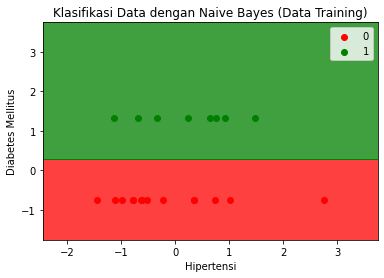

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], 
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Hipertensi')
plt.ylabel('Diabetes Mellitus')
plt.legend()
plt.show()

kita ingin menggambarkan (persebaran data) x_test dengan y_test nya

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


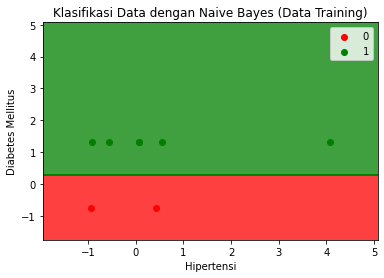

In [36]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], 
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Hipertensi')
plt.ylabel('Diabetes Mellitus')
plt.legend()
plt.show()